# Analiza zločina u Sjedinjenim Američkim Državama

"*Da je čovječanstvo odvajkada bilo razumno, historija ne bi bila dugačka hronika gluposti i zločina.*"
-> Arthur Schopenhauer

## Uvod

Zločini su nažalost normalna pojava današnjice i kao takvi su prisutni u svim nastanjenim područjima.

In [1]:
#tu cu importat sve sta ce mi trebat
import pandas as pd
import scipy as sc
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from IPython.display import display
from IPython.display import Image
from IPython.display import HTML

U ovom radu koncentrirat ćemo se na zločine počinjene u Sjedinjenim Američkim Državama, točnije na nasilne zločine (eng. *violent crime*) i imovinske zločine (eng.*property crime*) te ćemo promatrati njihovu povezanost s razvijenošću.
Možda se pitate zašto upravo SAD? Odgovor je: zato što smo jako fokusirani na događanja na drugom kontinentu, a i zbog pretpostavke koju dobivamo iz medija da tamo postoji "ne mali" broj kriminalnih djela.

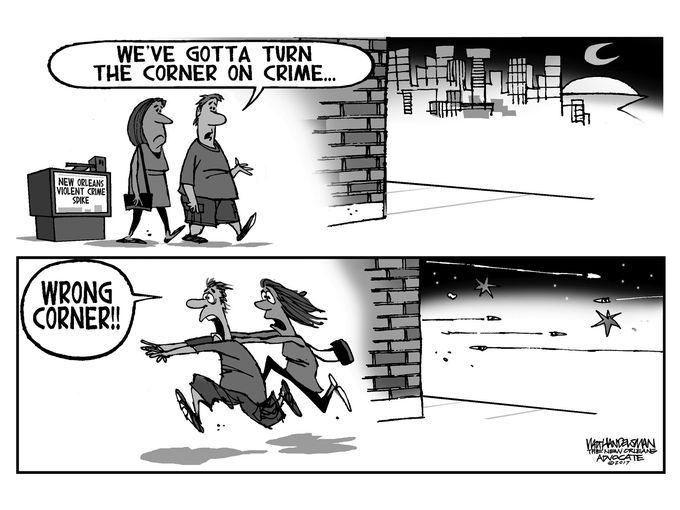

In [2]:
Image('img/crimeCartoon.jpg',width="500")

Ispitat ćemo povezanost stope nasilnih zločina (nasilni zločini,ubojstva,silovanja,..) i stope imovinskog kriminala (krađe,...) po 100 000 stanovnika s gospodarskom razvijenošću pojedine savezne države.
Još ćemo na kraju na temelju podataka o stopama zločina u vremenskom intervalu od 1995. do 2016. godine na razini cijelog SAD-a promatrati trend porasta/opadanja stopa navedenih kategorija zločina.

##  Prikupljanje podataka

Podaci o kriminalnim djelima preuzeti su s web stranice FBI: Uniform Crime Reporting koju možete naći na sljedećem linku: https://ucr.fbi.gov 

Korišteni su sljedeći podaci:

• Tablica 1 - podatak za stope zločina po 100 000 stanovnika na razini cijelog SAD-a u vremenskom intervalu od 1995. do 2016. godine. Ti podaci su spemljeni u datoteci *years.txt* . 

• Tablica 3 - podaci za zločine iz 2016. godine na razini saveznih država. Za svaku saveznu državu je izračunata stopa nasilnih zločina i stopa imovinskih zločina  po 100 000 stanovnika prema formuli:

$s = \frac{brojZlocina}{Populacija}*100 000$.

Također koristimo podatke o stopi BDP-a po stanovniku (izraženo u US dolarima) za 2016. godinu po saveznim državama te će nam taj podatak biti pokazatelj gospodarske razvijenosti pojedine savezne države.

Ti podaci su spremljeni u datoteci *states.txt* dok se sama Tablica 3 može pronaći u folderu data/.

## 1. Analiza stope BDP-a i stope zločina po saveznim državama za 2016. godinu 

U ovom dijelu koristimo podatke iz datoteke *states.txt* . Prikaz datoteke *states.txt* :

In [3]:
names = ['state','stopa_nasilnih_zločina','stopa_imovinskih_zločina','BDP']
datas = pd.read_csv('data/states.txt', delimiter='\t', names=names) 

#pretvorba vrijednosti u float
stopa_nasilnih_zločina1 = [float(v) for v in datas.stopa_nasilnih_zločina]
datas['stopa_nasilnih_zločina'] = stopa_nasilnih_zločina1
stopa_imovinskih_zločina1 = [float(v) for v in datas.stopa_imovinskih_zločina]
datas['stopa_imovinskih_zločina'] = stopa_imovinskih_zločina1
BDP1 = [float(v) for v in datas.BDP]
datas['BDP'] = BDP1

state = np.asarray(datas.state)
stopa_nasilnih_zločina = np.asarray(datas.stopa_nasilnih_zločina)
stopa_imovinskih_zločina = np.asarray(datas.stopa_imovinskih_zločina)
BDP = np.asarray(datas.BDP)

datas.head(10)

,state,stopa_nasilnih_zločina,stopa_imovinskih_zločina,BDP
0,Alabama,532.3,2947.8,42124.0
1,Alaska,804.2,3353.0,58356.0
2,Arizona,470.1,2978.4,43709.0
3,Arkansas,550.9,3268.6,40388.0
4,California,445.3,2553.0,66310.0
5,Colorado,342.6,2740.7,58422.0
6,Connecticut,227.1,1808.0,73643.0
7,Delaware,508.8,2766.0,73931.0
8,Florida,430.3,2686.8,44964.0
9,Georgia,397.6,3004.5,50955.0


Radimo opisnu analizu podataka. Zadani podaci su stopa nasilnih zločina i stopa imovinskih zločina po saveznoj državi u 2016. godini te stopa BDP-a po stanovniku po saveznim državama izražena u US dolarima za 2016. godinu.
Navedene podatke zovemo uzorci, a označavamo ih s $x$.

### Korištene vrijednosti:

duljina uzorka:  $n$

minimum ($min$):   minimalna vrijednost koju poprima uzorak

maksimum ($max$):   minimalna vrijednost koju poprima uzorak 

aritmetička sredina ($\mu$):   $\mu=\frac{x_1+ \dots + x_1}{n}$ 

varijanca ($Var$):   $Var= \frac{\sum_{1}^{n} (x_i-\mu)^2}{n}$

standardna devijacija ($\sigma$):   $\sigma = \sqrt{Var}$


In [4]:
def kategorija(x):
    n, (minimum, maximum), mean, var, s, k = stats.describe(x)
    return np.array([mean, var, np.sqrt(var), minimum ,maximum])

ispis={ '': pd.Series(np.array([r'$\mu$', '$Var$', r'$\sigma$', '$min$' ,'$max$'])),
        'stopa_nasilnih_zločina': pd.Series(kategorija(stopa_nasilnih_zločina)),
        'stopa_imovinskih_zločina': pd.Series(kategorija(stopa_imovinskih_zločina)),
        'BDP': pd.Series(kategorija(BDP))
      }

ispis_kat = pd.DataFrame(ispis)
ispis_kat = ispis_kat.set_index('')
ispis_kat

,BDP,stopa_imovinskih_zločina,stopa_nasilnih_zločina
,,,
$\mu$,5.438468e+04,2458.088000,378.038000
$Var$,9.516702e+07,354302.748833,21195.942812
$\sigma$,9.755359e+03,595.233357,145.588265
$min$,3.602900e+04,1512.900000,123.800000
$max$,7.536000e+04,3937.100000,804.200000


### Histogrami

Histogramima ćemo pomoću relativnih frekvencija naslutiti distibuciju uzorka te ćemo nacrtati i normalnu funkciju gustoće za uzorak (crvena iscrtana linija) kako bi mogli predvidjeti je li distribucija normalna.

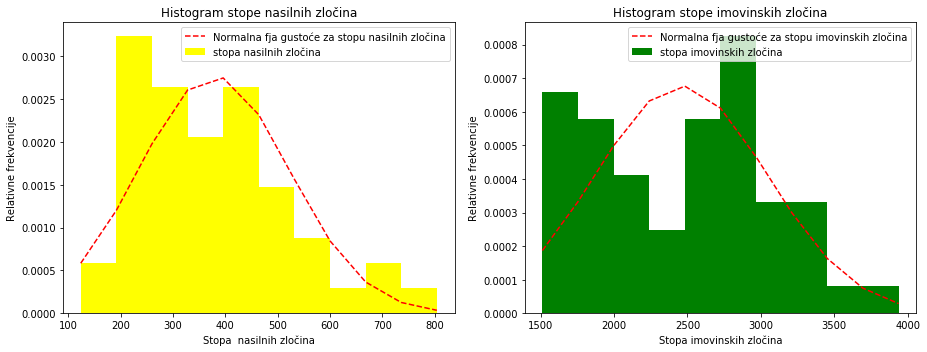

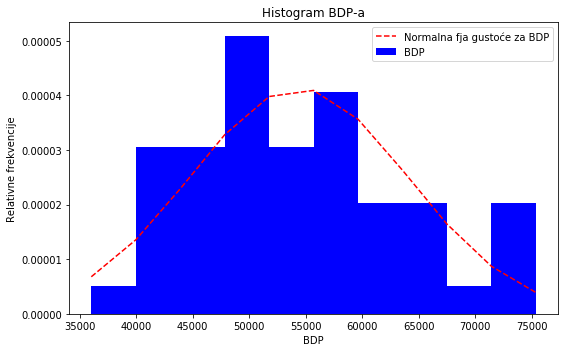

In [5]:
fig, axes = plt.subplots(1,2,figsize=(13, 5))

n, bins, patches = axes[0].hist(stopa_nasilnih_zločina, normed=1, facecolor='yellow', alpha=1, label="stopa nasilnih zločina")
y = mlab.normpdf(bins, stopa_nasilnih_zločina.mean(), np.sqrt(stopa_nasilnih_zločina.var()))
axes[0].plot(bins, y, 'r--', label=u'Normalna fja gustoće za stopu nasilnih zločina')
axes[0].set_xlabel('Stopa  nasilnih zločina')
axes[0].set_ylabel('Relativne frekvencije')
axes[0].set_title('Histogram stope nasilnih zločina');

n, bins, patches = axes[1].hist(stopa_imovinskih_zločina, normed=1, facecolor='green', alpha=1, label="stopa imovinskih zločina")
y = mlab.normpdf(bins, stopa_imovinskih_zločina.mean(), np.sqrt(stopa_imovinskih_zločina.var()))
axes[1].plot(bins, y, 'r--', label=u'Normalna fja gustoće za stopu imovinskih zločina')
axes[1].set_xlabel('Stopa imovinskih zločina')
axes[1].set_ylabel('Relativne frekvencije')
axes[1].set_title('Histogram stope imovinskih zločina');

axes[0].legend()
axes[1].legend()
fig.tight_layout();

fig,ax = plt.subplots(1,1,figsize=(8, 5))
n, bins, patches = ax.hist(BDP, normed=1, facecolor='blue', alpha=1, label="BDP")
y = mlab.normpdf(bins, BDP.mean(), np.sqrt(BDP.var()))
ax.plot(bins, y, 'r--', label=u'Normalna fja gustoće za BDP')
ax.set_xlabel('BDP')
ax.set_ylabel('Relativne frekvencije')
ax.set_title('Histogram BDP-a');

ax.legend()
fig.tight_layout();

### Boxplot

Neka je $x=(x_1, \dots , x_n)$ uzorak. U našem slučaju su to stopa BDP-a i stopa zločina. 
Neka je $x_{(1)}, \dots , x_{(n)}$ sortirani uzorak.
Neka su $q_L$ donji kvartil uzorka, $q_U$ gornji kvartil uzorka. Inerkvartil se definira kao $IQR=q_U-q_L$.
Karakteristična petorka uzorka je $(x_{(1)}, q_L, m, q_U, x_{(n)})$ .
Kružići označavaju sve točke izvan tih granica i smatraju se outlierima.

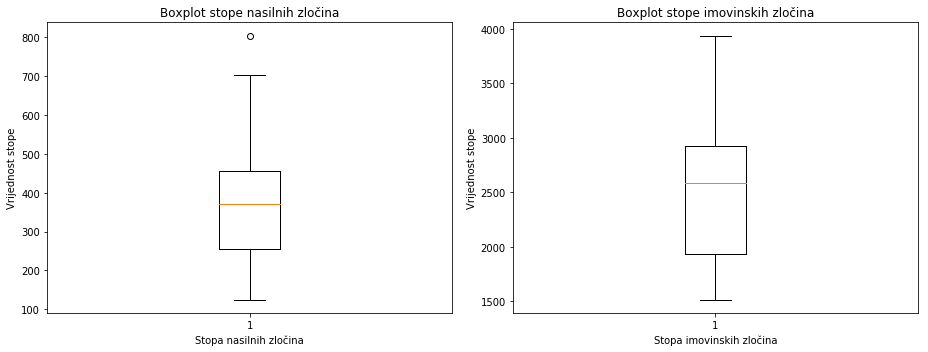

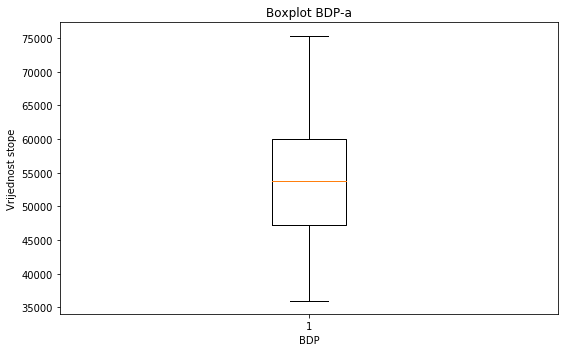

In [6]:
fig, axes = plt.subplots(1,2, figsize=(13,5))
axes[0].boxplot(stopa_nasilnih_zločina)
axes[0].set_xlabel('Stopa nasilnih zločina')
axes[0].set_ylabel('Vrijednost stope')
axes[0].set_title(r'Boxplot stope nasilnih zločina');
axes[1].boxplot(stopa_imovinskih_zločina)
axes[1].set_xlabel('Stopa imovinskih zločina')
axes[1].set_ylabel('Vrijednost stope')
axes[1].set_title(r'Boxplot stope imovinskih zločina');
fig.tight_layout();

fig, ax = plt.subplots(1,1, figsize=(8,5))
ax.boxplot(BDP)
ax.set_xlabel('BDP')
ax.set_ylabel('Vrijednost stope')
ax.set_title(r'Boxplot BDP-a');
fig.tight_layout();

### Ispitivanje normalnosti uzorka

Želimo ispitati jesu li stope BDP-a po stanovniku i stope nasilnih/imovinskih zločina, svaki u oznaci $ Y = (Y_{(1)}, \dots , Y_{(n)}) $, normalno distribuirani.

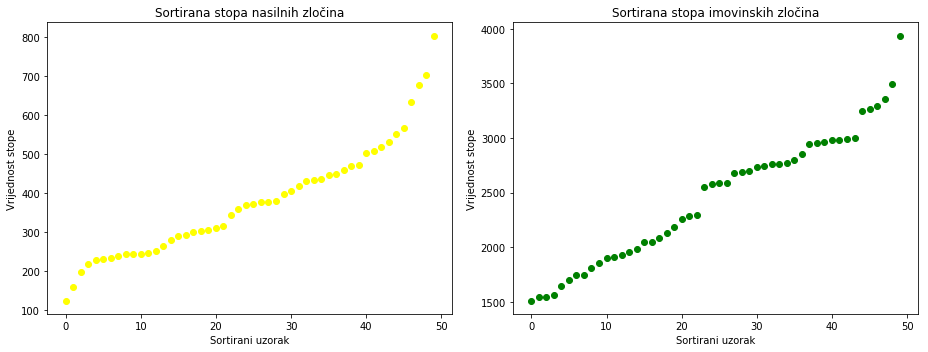

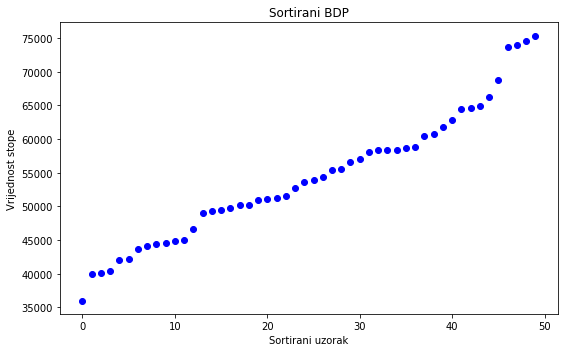

In [7]:
n=np.arange(0,len(BDP))
fig, axes=plt.subplots(1,2, figsize=(13,5))
axes[0].scatter(n, np.sort(stopa_nasilnih_zločina), c='yellow') 
axes[0].set_xlabel('Sortirani uzorak')
axes[0].set_ylabel('Vrijednost stope')
axes[0].set_title(r'Sortirana stopa nasilnih zločina');
axes[1].scatter(n, np.sort(stopa_imovinskih_zločina), c='green')
axes[1].set_xlabel('Sortirani uzorak')
axes[1].set_ylabel('Vrijednost stope')
axes[1].set_title(r'Sortirana stopa imovinskih zločina');
fig.tight_layout();

n=np.arange(0,len(BDP))
fig, ax=plt.subplots(1,1, figsize=(8,5))
ax.scatter(n, np.sort(BDP), c='blue') 
ax.set_xlabel('Sortirani uzorak')
ax.set_ylabel('Vrijednost stope')
ax.set_title(r'Sortirani BDP');
fig.tight_layout();

### Normalni vjerojatnosni graf

Neka je $ y_{(1)}, \dots , y_{(n)} $ uređena realizacija slučajnog uzorka $ Y_{(1)}, \dots , Y_{(n)} $. Pomoću funkcije distribucije jedinične normalne razdiobe $ \Phi $, definiramo brojeve $ x_i = \Phi^{-1} \left( \frac{i-3/8}{n+1/4} \right) $, $ i=1, \dots , n $.
Tada u Kartezijevom koordinatnom sustavu prikažemo parove točaka $ (x_i, y_{(i)}) $.
Ako je $ Y_{(1)}, \dots , Y_{(n)} $ slučajni uzorak iz normalnog modela $N(\mu, \sigma^2)$, onda u normalnom vjerojatnosnom grafu točke $ (x_i, y_{(i)}) $ moraju biti aproksimativno na pravcu $ y= \mu +\sigma x $.

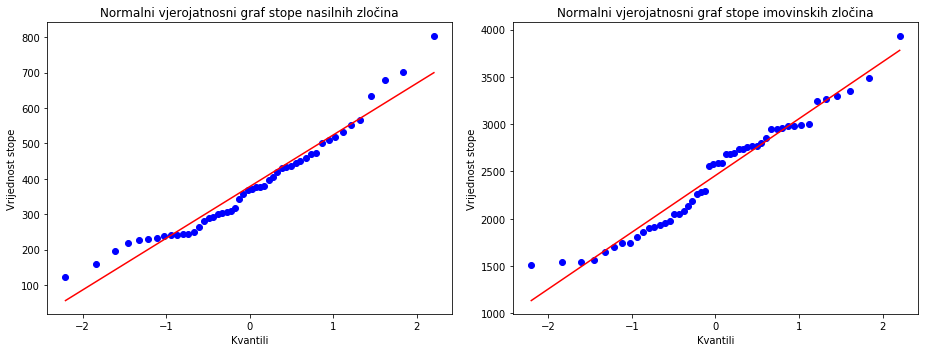

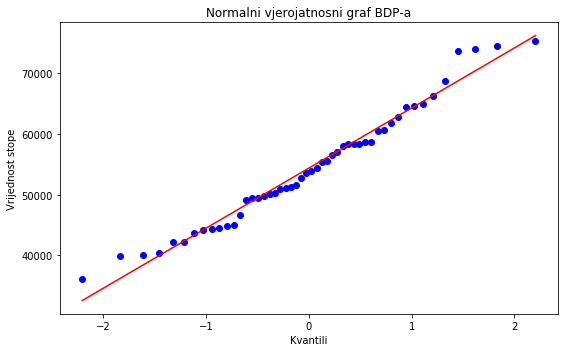

In [8]:
fig, axes = plt.subplots(1,2, figsize=(13,5))
y=sc.stats.probplot(stopa_nasilnih_zločina, plot=axes[0])
y=sc.stats.probplot(stopa_imovinskih_zločina, plot=axes[1])
axes[0].set_xlabel('Kvantili')
axes[0].set_ylabel('Vrijednost stope')
axes[0].set_title('Normalni vjerojatnosni graf stope nasilnih zločina');
axes[1].set_xlabel('Kvantili')
axes[1].set_ylabel('Vrijednost stope')
axes[1].set_title('Normalni vjerojatnosni graf stope imovinskih zločina');
fig.tight_layout();

fig, ax = plt.subplots(1,1, figsize=(8,5))
y=sc.stats.probplot(BDP, plot=ax)
ax.set_xlabel('Kvantili')
ax.set_ylabel('Vrijednost stope')
ax.set_title('Normalni vjerojatnosni graf BDP-a');
fig.tight_layout();

Iz opisne statistike možemo pretpostaviti da stopa BDP-a ima normalnu distribuciju, dok se za stope zločina ne može tvrditi sa grafova.

## Statistički testovi

### Test normalnosti 

Provodimo test normalnosti za ispitivanje normalnosti distribucije podataka. Na razini značajnosti $\alpha=0.05$ testiramo hipoteze:
\begin{aligned}
&H_0: \, X \sim N(\mu, \sigma^2) \\ &H_1: \, ne \, H_0
\end{aligned}

In [9]:
from decimal import Decimal
def normalnost (x):
    k,pv = stats.normaltest(x)
    return np.array(round(pv,4))     
ispis={ '': pd.Series(np.array(['p-vrijednost testa normalnosti'])),
        'BDP': pd.Series([normalnost(BDP)]),
        'stopa nasilnih zločina': pd.Series([normalnost(stopa_nasilnih_zločina)]),
        'stopa imovinskih zločina': pd.Series([normalnost(stopa_imovinskih_zločina)])
      }

ispis_kat = pd.DataFrame(ispis)
ispis_kat = ispis_kat.set_index('')
ispis_kat

,BDP,stopa imovinskih zločina,stopa nasilnih zločina
,,,
p-vrijednost testa normalnosti,0.4574,0.3205,0.0496


Vidimo da je za stope BDP-a i stope imovinskih zločina p-vrijednost $p>\alpha$, što znači da ne možemo odbaciti hipotezu $H_0$ u korist $H_1$ na razini značajnosti od $\alpha=0.05$, iz čega slijedi da su te stope normalno distribuirane.
Stopa nasilnih zločina ima p-vrijednost $p<\alpha$, što znači da možemo odbaciti hipotezu $H_0$ u korist $H_1$ na razini značajnosti od $\alpha=0.05$, iz čega slijedi da ta stopa nema normalnu distribuciju.

### $\chi^2$ - test nezavisnosti

Provjeravamo jesu li stope BDP-a po stanovniku i stope nasilnih/imovinskih zločina nezavisna statistička obilježja.
 
Stopu BDP-a dijelimo u tri kategorije. Savezne države s visokim BDP-om su one čiji BDP po stanovniku iznosi više od $65 000 $USD. Savezne države sa srednjim BDP-om su one čiji BDP po stanovniku iznosi između $45 000$ i $65 000$ USD. Savezne države sa niskim BDP-om su one čiji BDP po stanovniku iznosi manje od $45 000$ USD. 

Stopu nasilnih zločina dijelimo u tri kategorije, visoka: $>450$, srednja: između $350 - 450$ i niska: $<350$ .

Stopu imovinskih zločina dijelimo u tri kategorije, visoka: $>3000$, srednja: između $2000 - 3000$ i niska: $<2000$ .

In [10]:
#dijelimo podatke u kategorije
#prefiks n označava nasilni,a prefiks i označava imovinski u varijablama
nvisok = datas.BDP[datas.stopa_nasilnih_zločina >= 450]
nsrednji = datas.BDP[datas.stopa_nasilnih_zločina < 450][datas.stopa_nasilnih_zločina > 350]
nnizak = datas.BDP[datas.stopa_nasilnih_zločina <= 350]

ivisok = datas.BDP[datas.stopa_imovinskih_zločina >= 3000]
isrednji = datas.BDP[datas.stopa_imovinskih_zločina < 3000][datas.stopa_imovinskih_zločina > 2000]
inizak = datas.BDP[datas.stopa_imovinskih_zločina <= 2000]

nvisok, ivisok = [0,0,0], [0,0,0]
nsrednji, isrednji = [0,0,0], [0,0,0]
nnizak, inizak = [0,0,0], [0,0,0]
lista=[45000,60000]

nvisok[0] = len(datas.BDP[datas.stopa_nasilnih_zločina >= 450][datas.BDP <= lista[0]])
nsrednji[0] = len(datas.BDP[datas.stopa_nasilnih_zločina < 450][datas.stopa_nasilnih_zločina > 350][datas.BDP <= lista[0]])
nnizak[0] = len(datas.BDP[datas.stopa_nasilnih_zločina <= 350][datas.BDP <= lista[0]])

ivisok[0] = len(datas.BDP[datas.stopa_imovinskih_zločina >= 3000][datas.BDP <= lista[0]])
isrednji[0] = len(datas.BDP[datas.stopa_imovinskih_zločina < 3000][datas.stopa_imovinskih_zločina > 2000][datas.BDP <= lista[0]])
inizak[0] = len(datas.BDP[datas.stopa_imovinskih_zločina <= 2000][datas.BDP <= lista[0]])

for i in range (1,2):
    nvisok[i] = len(datas.BDP[datas.stopa_nasilnih_zločina >= 450][datas.BDP > lista[i-1]][datas.BDP <= lista[i]])
    nsrednji[i] = len(datas.BDP[datas.stopa_nasilnih_zločina < 450][datas.stopa_nasilnih_zločina > 350][datas.BDP > lista[i-1]][datas.BDP <= lista[i]])
    nnizak[i] = len(datas.BDP[datas.stopa_nasilnih_zločina <= 350][datas.BDP > lista[i-1]][datas.BDP <= lista[i]])
    ivisok[i] = len(datas.BDP[datas.stopa_imovinskih_zločina >= 3000][datas.BDP > lista[i-1]][datas.BDP <= lista[i]])
    isrednji[i] = len(datas.BDP[datas.stopa_imovinskih_zločina < 3000][datas.stopa_imovinskih_zločina > 2000][datas.BDP > lista[i-1]][datas.BDP <= lista[i]])
    inizak[i] = len(datas.BDP[datas.stopa_imovinskih_zločina <= 2000][datas.BDP > lista[i-1]][datas.BDP <= lista[i]])
    
nvisok[2] = len(datas.BDP[datas.stopa_nasilnih_zločina >= 450][datas.BDP >= lista[1]])
nsrednji[2] = len(datas.BDP[datas.stopa_nasilnih_zločina < 450][datas.stopa_nasilnih_zločina > 350][datas.BDP >= lista[1]])
nnizak[2] = len(datas.BDP[datas.stopa_nasilnih_zločina <= 350][datas.BDP >= lista[1]]) 

ivisok[2] = len(datas.BDP[datas.stopa_imovinskih_zločina >= 3000][datas.BDP <= lista[1]])
isrednji[2] = len(datas.BDP[datas.stopa_imovinskih_zločina < 3000][datas.stopa_imovinskih_zločina > 2000][datas.BDP <= lista[1]])
inizak[2] = len(datas.BDP[datas.stopa_imovinskih_zločina <= 2000][datas.BDP <= lista[1]])

#nvisok, nsrednji, nnizak
ivisok, isrednji, inizak

([3, 3, 6], [7, 14, 21], [2, 8, 10])

In [11]:
nz = np.array([nvisok, nsrednji, nnizak])
print ('Očekivane frekvencije za stopu nasilnih zločina i BDP-a po stanovniku:')
print (sc.stats.contingency.expected_freq(nz))
print ('\n')
print ('Očekivane frekvencije za stopu imovinskih zločina i BDP-a po stanovniku:')
iz = np.array([ivisok, isrednji, inizak])
print (sc.stats.contingency.expected_freq(iz))

Očekivane frekvencije za stopu nasilnih zločina i BDP-a po stanovniku:
[[ 3.12  6.5   3.38]
 [ 3.36  7.    3.64]
 [ 5.52 11.5   5.98]]


Očekivane frekvencije za stopu imovinskih zločina i BDP-a po stanovniku:
[[ 1.94594595  4.05405405  6.        ]
 [ 6.81081081 14.18918919 21.        ]
 [ 3.24324324  6.75675676 10.        ]]


$\chi^2$ testom na razini značajnosti od $\alpha=0.05$ testiramo hipoteze
\begin{equation*}
\begin{aligned}
&H_0: \text{navedena obilježja su nezavisna} \\ &H_1: \, ne \, H_0
\end{aligned}
\end{equation*}
uz testnu statistiku $ H=\sum_{i=1}^{3} \sum_{j=1}^{3} \frac{(N_{ij}-n_{ij})^2}{n_{ij}} \sim \chi^2(df), df=(3-1)(3-1)=4 $


In [12]:
chi2tnz, pvnz, dfnz, expectednz = sc.stats.chi2_contingency(nz)
sstr = 'Testna statistika za nezavisnost BDP-a i stope nasilnih zločina = %6.4f, p-vrijednost = %6.4f, stupnjevi slobode = %6.4f '
print (sstr %( chi2tnz, pvnz, dfnz))
print ('\n')

chi2tiz, pviz, dfiz, expectediz = sc.stats.chi2_contingency(iz)
sstr = 'Testna statistika za nezavisnost BDP-a i stope imovinskih zločina = %6.4f, p-vrijednost = %6.4f, stupnjevi slobode = %6.4f '
print (sstr %( chi2tiz, pviz, dfiz))

Testna statistika za nezavisnost BDP-a i stope nasilnih zločina = 2.4232, p-vrijednost = 0.6584, stupnjevi slobode = 4.0000 


Testna statistika za nezavisnost BDP-a i stope imovinskih zločina = 1.5581, p-vrijednost = 0.8163, stupnjevi slobode = 4.0000 


Kako je p-vrijednost , $p>\alpha$ , tada na razini značajnosti od 5% ne možemo odbaciti hipotezu $H_0$ u korist $H_1$ .

### Testovi korelacije 

### Pearsonov koeficijent korelacije

Pošto su stope BDP-a i stope imovinskih zločina normalno distibuirani onda koristimo Pearsonov koeficijent korelacije.

In [13]:
koef, pv = sc.stats.pearsonr(stopa_imovinskih_zločina, BDP)
sstr = 'Pearsonov koeficijent za BDP i stopu imovinskih zločina: %6.4f, p-vrijednost: %6.4f '
print (sstr % (koef, pv))

Pearsonov koeficijent za BDP i stopu imovinskih zločina: -0.3442, p-vrijednost: 0.0144 


Dakle, zbog $p<\alpha$, postoji slaba negativna korelacija između stope BDP-a i stope imovinskih zločina.

### Spearmanov koeficijent korelacije

Pošto za stopu nasilnih zločina ne možemo reći da dolazi iz normalne distribucije onda koristimo Spearmanov koeficijent korelacije.

Spearmanov koeficijent za BDP i stope nasilnih zločina: -0.1965, p-vrijednost: 0.1713 


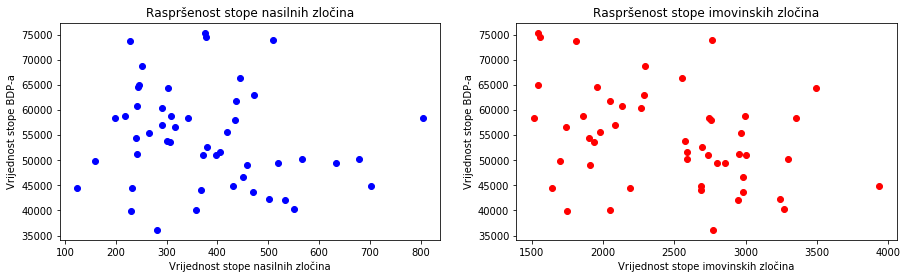

In [14]:
koefnz, pvnz = sc.stats.spearmanr(BDP, stopa_nasilnih_zločina)
sstr = 'Spearmanov koeficijent za BDP i stope nasilnih zločina: %6.4f, p-vrijednost: %6.4f '
print (sstr % (koefnz, pvnz))

fig, axes=plt.subplots(1,2, figsize=(15,4))
axes[0].scatter(stopa_nasilnih_zločina, BDP, c='blue')
axes[1].scatter(stopa_imovinskih_zločina, BDP, c='red')
axes[0].set_xlabel('Vrijednost stope nasilnih zločina')
axes[1].set_xlabel('Vrijednost stope imovinskih zločina')
axes[0].set_ylabel('Vrijednost stope BDP-a')
axes[1].set_ylabel('Vrijednost stope BDP-a')
axes[0].set_title(u'Raspršenost stope nasilnih zločina')
axes[1].set_title(u'Raspršenost stope imovinskih zločina')
axes[1].axis('tight')
axes[0].axis('tight');

Uočimo kako zbog raspršenosti i $p>\alpha$,ne možemo ništa zaključiti iz Spearmanovog koeficijenta. Zbog toga koristimo Kendalov koeficijent korelacije.

### Kendalov koeficijent korelacije

Kendalov koeficijent korelacije $\tau$ određuje jačinu veze dvaju diskretnih statističkih obilježja u odnosu na rangove njihove vrijednosti. Kendalov koeficijent korelacije dobijemo tako da najprije vrijednostima obilježja $X$ i $Y$ dodijelimo rangove. Zatim promatramo parove rangova u uzorku za dvodimenzionalno obilježje $(X,Y)$. Označimo sa $C$ broj inverzija među tim parovima, te neka je $D$ broj onih parova koji nisu u inverziji. Tada je Kendalllov koeficijent korelacije jednak
 $$\tau=\frac{C-D}{C+D}$$

In [15]:
datas.corr(method='kendall')

,stopa_nasilnih_zločina,stopa_imovinskih_zločina,BDP
stopa_nasilnih_zločina,1.000000,0.444898,-0.137959
stopa_imovinskih_zločina,0.444898,1.000000,-0.222857
BDP,-0.137959,-0.222857,1.000000


Primjećujemo da i ovom metodom dobivamo skoro nikakvu povezanost stope BDP-a i stope nasilnih zločina .

### Zaključak

Zaključujemo da su stope BDP-a i imovinskih zločina normalno distribuirane, dok za stope nasilnih zločina ne možemo donijeti taj zaključak, iako su ti podaci jako blizu normalnoj distribuciji.

Testovima nezavisnosti nismo uspjeli dokazati postoji li povezanost između razvijenosti savezne države (stopa BDP-a) i stopa nasilnih i imovinskih zločina u tim saveznim državama.
Ipak smo uspjeli pokazati da postoji slaba korelacija između razvijenosti savezne države i stope imovinskih zločina u toj saveznoj državi te je procijenjeno da je koeficijent korelacije između tih obilježja negativan. Dakle, uspjeli smo pokazati da postoji slabi odnos između porasta BDP-a i smanjenja stope imovinskih zločina.
S druge strane, nismo našli odnos (ili je on jako mali) između razvijenosti i stope nasilnih zločina.

Drugim riječima, razvijene savezne države ne moraju nužno imati manju stopu nasilnih zločina, ali će ipak u nekoj mjeri imati manju stopu imovinskih zločina.

## 2. Analiza stope zločina od 1995. do 2016. godine na razini cijelog SAD-a

U ovom dijelu koristimo podatke iz datoteke *years.txt* .

Prikaz datoteke *years.txt* :

In [16]:
names = ['godina','stopa_nasilnih_zločina','stopa_imovinskih_zločina']
datac = pd.read_csv('data/years.txt', delimiter='\t', names=names) #datac-sadrzi zlocine po godinama

#pretvorba vrijednosti u float i int
godina1 = [int(v) for v in datac.godina]
datac['godina'] = godina1
stopa_nasilnih_zločina1 = [float(v) for v in datac.stopa_nasilnih_zločina]
datac['stopa_nasilnih_zločina'] = stopa_nasilnih_zločina1
stopa_imovinskih_zločina1 = [float(v) for v in datac.stopa_imovinskih_zločina]
datac['stopa_imovinskih_zločina'] = stopa_imovinskih_zločina1

godina = np.asarray(datac.godina)
stopa_nasilnih_zločina = np.asarray(datac.stopa_nasilnih_zločina)
stopa_imovinskih_zločina = np.asarray(datac.stopa_imovinskih_zločina)

datac.head(10)

,godina,stopa_nasilnih_zločina,stopa_imovinskih_zločina
0,1995,684.5,4590.5
1,1996,636.6,4451.0
2,1997,611.0,4316.3
3,1998,567.6,4052.5
4,1999,523.0,3743.6
5,2000,506.5,3618.3
6,2001,504.5,3658.1
7,2002,494.6,3624.1
8,2003,475.8,3588.4
9,2004,463.2,3517.1


## Statistički testovi

### Shapiro-Wilk test normalnosti

Na razini značajnosti $\alpha=0.05$ testiramo hipoteze:
\begin{aligned}
&H_0: \, X \sim N(\mu, \sigma^2) \\ &H_1: \, ne \, H_0
\end{aligned}

In [17]:
def Shapiro(x):
    t, pv = sc.stats.shapiro(x)
    return np.array(round(pv,4))
   
    
ispis={ '': pd.Series(np.array([ 'p-vrijednost S-W testa'])),
        'stopa nasilnih zločina': pd.Series([Shapiro(stopa_nasilnih_zločina)]),
        'stopa imovinskih zločina': pd.Series([Shapiro(stopa_imovinskih_zločina)]),
      }

ispis_kat = pd.DataFrame(ispis)
ispis_kat = ispis_kat.set_index('')
ispis_kat

,stopa imovinskih zločina,stopa nasilnih zločina
,,
p-vrijednost S-W testa,0.5406,0.0761


Uočimo da za oba podatka vrijedi $p>\alpha$ pa ne možemo odbaciti hipotezu $H_0$, iz čega slijedi da su podaci normalno distribuirani.

### Pouzdani intervali

S obzirom da podaci dolaze iz normalne razdiobe, onda za njih možemo izračunati pouzdane intervale za očekivanje, varijancu i standardnu devijaciju za $\alpha=0.05$.
Znamo da za slučajan uzorak $X_1, \dots , X_n$, $n>30$, $\mu= E[X]$ i $\sigma^2=Var(X_1)$ vrijedi da je
\begin{aligned}
&Z= \frac{\overline{X_n}-\mu}{\sigma} \sqrt{n} \sim AN(0,1) \\ 
&V= \frac{n-1}{\sigma^2} S_n^2 \sim \chi^2(n-1)
\end{aligned}
Gdje $S_n^2$ predstavlja uzoračku varijancu. Pouzdani interval za standardnu derivaciju se računa tako da se izvadi drugi korijen od varijance.

In [18]:
print ('Pouzdani intervali za:')
print ('\n')

def ispis_intervala(x,naziv):
    print ('stopu '+naziv+' zločina')
    mean, var, sigma = sc.stats.bayes_mvs(x, alpha=0.95)
    sstr = 'mean:[ %6.4f, %6.4f ]'
    print (sstr %(mean[1][0], mean[1][1] ))
    sstr = 'varijanca:[ %6.4f, %6.4f ]'
    print (sstr %(var[1][0], var[1][1] ))
    sstr = 'standardna devijacija:[ %6.4f, %6.4f ]'
    print (sstr %(sigma[1][0], sigma[1][1] ))
    print ('\n')
    
ispis_intervala(stopa_nasilnih_zločina, 'nasilnih')
ispis_intervala(stopa_imovinskih_zločina, 'imovinskih')

Pouzdani intervali za:


stopu nasilnih zločina
mean:[ 435.7149, 514.4578 ]
varijanca:[ 4667.3459, 16103.6499 ]
standardna devijacija:[ 68.3180, 126.9002 ]


stopu imovinskih zločina
mean:[ 3114.2765, 3655.7689 ]
varijanca:[ 220714.7695, 761527.7409 ]
standardna devijacija:[ 469.8029, 872.6556 ]




### Linearna regresija

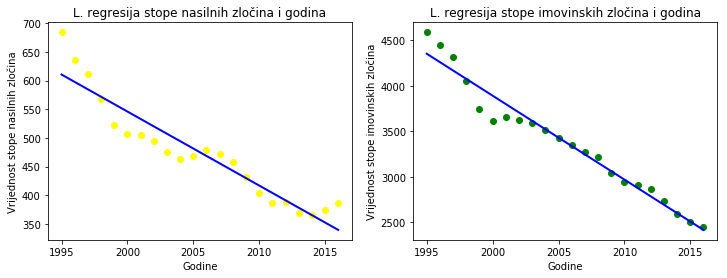

In [19]:
slope1, intercept1, r1, pv1, std_err1 = sc.stats.linregress(godina, stopa_nasilnih_zločina)
slope2, intercept2, r2, pv2, std_err2 = sc.stats.linregress(godina, stopa_imovinskih_zločina)

fig, axes=plt.subplots(1,2, figsize=(12,4))
axes[0].plot(godina,stopa_nasilnih_zločina,'o', c='yellow')
axes[0].plot(godina, slope1*godina+intercept1, lw=2, c='blue' )
axes[0].set_title('L. regresija stope nasilnih zločina i godina')
axes[0].set_xlabel('Godine')
axes[0].set_ylabel('Vrijednost stope nasilnih zločina')

axes[1].plot(godina, stopa_imovinskih_zločina, 'o', c='green')
axes[1].plot(godina, slope2*godina+intercept2, lw=2, c='blue' )
axes[1].set_title('L. regresija stope imovinskih zločina i godina')
axes[1].set_xlabel('Godine')
axes[1].set_ylabel('Vrijednost stope imovinskih zločina')

axes[1].axis('tight')
axes[0].axis('tight');

Uočimo da se može vidjeti trend opadanja. Prikaz bez pravca:

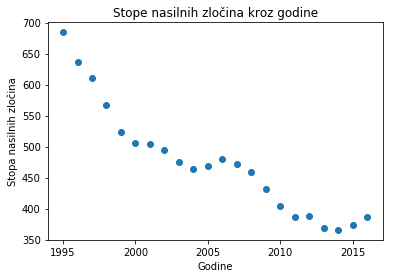

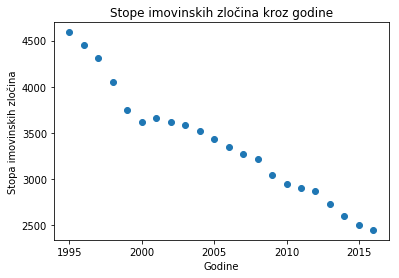

In [20]:
plt.scatter(datac['godina'], datac['stopa_nasilnih_zločina'])
plt.title('Stope nasilnih zločina kroz godine')
plt.xlabel('Godine')
plt.ylabel('Stopa nasilnih zločina')
plt.show()
plt.scatter(datac['godina'], datac['stopa_imovinskih_zločina'])
plt.title('Stope imovinskih zločina kroz godine')
plt.xlabel('Godine')
plt.ylabel('Stopa imovinskih zločina')
plt.show()

### Zaključak

Dakle, unatoč brojnim medijskim naslovima i vijestima o masovnim pucanjima, ubojstvima,... pokazali smo da ipak postoji trend opadanja navedenih stopa kroz godine. Primjetimo da stopa imovinskih zločina skoro pa linearno pada, dok stopa nasilnih zločina u globalu pada, iako ima porasta i opada,tj. nije posve linearno.


Kroz ovaj rad smo pokazali da stanje u Americi možda i nije toliko loše kako nam mediji predstavljaju. Također smo pokazali da veća razvijenost ne znači nužno da će stopa nasilnog kriminala biti manja, no s druge strane bit će nešto manja stopa imovinskih zločina.
Drugim riječima, svejedno je hoćete li, ukoliko se na to odlučite, živjeti u New Yorku ili New Mexicu. Na kraju su vam otprilike iste šanse hoće li vas opljačkati ili ubiti. No, s obzirom da su stope u padu, možete riskirati :)

PRESS ME:

In [21]:
import IPython
IPython.display.Audio('data/trump.mp3')

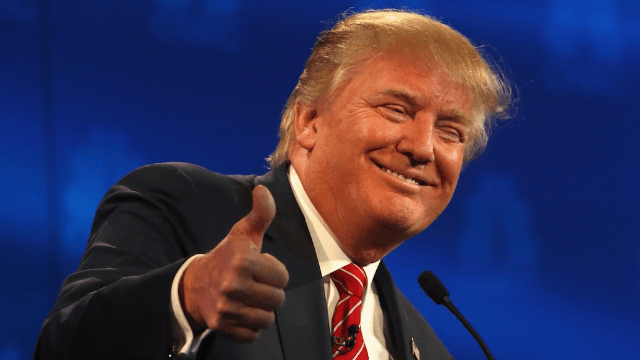

In [22]:
Image('img/trump.png')